<a href="https://colab.research.google.com/github/ViniciusBrSc/Titanic_Project_Bootcamp/blob/main/Titanic_Project_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Competition


![](https://ogimg.infoglobo.com.br/in/20580150-16c-8bb/FT1086A/760/titanic.jpg)

## Entendimento de negócio


O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes com uma taxa de sobrevivência de aproximadamente 32%. Essa tragédia sensacional chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.


## Escopo

Para esse projeto, é preciso fazer uma análise e prever se um passageiro sobreviveu ao naufrágio do Titanic ou não.
Para cada um no conjunto de testes, você precisa informar um número para o IdPassageiro e o modelo deve prever um valor 0 ou 1 para a variável Sobreviveu, sendo 0 - Não e 1 - Sim. 

Com isso, teremos um problema de Classificação, para determinar quem sobreviveu ou não ao naufrágio:


* **Problema**: classificação binária
* **Algoritmo**: treinamento supervisionado
* **Base de dados**: arquivos csv originarios do Kaggle's Titanic: Machine Learning from Disaster (https://www.kaggle.com/c/titanic/data)
* **Variável alvo**: Sobreviveu (Survived)

## Métricas
* Objetivo qualitativo: Prever se um passageiro sobreviveu ou não ao naufrágio.
* Figura de mérito: Porcentagem de passageiros que você prevê corretamente. (Accuracy)
* Benchmarking: melhor que 80%.
* Métrica deve ser medida sobre um conjunto de teste de 30% dos dados.


## Planejamento
* Sprint 1: entendimento de negócio e preparação dos dados.
* Sprint 2: Análise de dados e construção de features.
* Sprint 3: Modelagem dos classificadores e avaliação dos resultados
* Sprint 4: Relatório dos resultados do modelo

## Arquitetura

* Dados:
  * Os dados são entregues através de 2 arquivos CSV

* Modelos:
  * Classificador binário para estimar a probabilidade da pessoa ter sobrvivido ou não ao desastre.
  * Os hiper-parâmetros dos modelos serão ajustados segundo uma busca em grid-search.
  * A base de dados será dividida em treino (70%) e teste (30%), mantendo a proporção de classes nos dois conjuntos de dados.
  * Os modelos serão avaliados considerando o conjunto de teste.
  
* Entregáveis:
  * Base de dados de teste com a previsão da sobrevivência de cada passageiro, em arquivo Excel.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sweetviz
#from pandas_profiling import ProfileReport as prep

In [2]:
# Loading the data:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_test.csv')
test['Survived'] = np.nan
df_all = pd.concat([train,test],axis=0).reset_index()

# Saving useless information about the passengers in a different frame: 
passengers = df_all[['PassengerId','Name','Ticket','Cabin']]
df_all.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
df_all

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,male,22.0,1,0,7.2500,S
1,1,2,1.0,1,female,38.0,1,0,71.2833,C
2,2,3,1.0,3,female,26.0,0,0,7.9250,S
3,3,4,1.0,1,female,35.0,1,0,53.1000,S
4,4,5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,male,NaN,0,0,8.0500,S
1305,414,1306,NaN,1,female,39.0,0,0,108.9000,C
1306,415,1307,NaN,3,male,38.5,0,0,7.2500,S
1307,416,1308,NaN,3,male,NaN,0,0,8.0500,S


In [3]:
# First treatment:
mode_embarked = df_all['Embarked'].mode()[0]
df_all['Embarked'].fillna(mode_embarked,inplace=True)
median_fare = df_all[(df_all['Pclass']==3)&(df_all['Age']>=60)]['Fare'].median()
df_all['Fare'].fillna(median_fare,inplace=True)

In [4]:
# Age bins: 1:[0,15), 2:[15,30), 3:[30,50), 4:[50,70), 5:[70,70+)
agebin=[]
for i,v in enumerate(df_all['Age']):
    if df_all['Age'].isnull()[i] == True:
        agebin.append(np.nan)
    elif v < 15:
        agebin.append(1)
    elif v < 30:
        agebin.append(2) 
    elif v < 50:
        agebin.append(3)
    elif v < 70:
        agebin.append(4)
    else:
        agebin.append(5) 
df_all['Age_bins'] = agebin
df_all

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bins
0,0,1,0.0,3,male,22.0,1,0,7.2500,S,2.0
1,1,2,1.0,1,female,38.0,1,0,71.2833,C,3.0
2,2,3,1.0,3,female,26.0,0,0,7.9250,S,2.0
3,3,4,1.0,1,female,35.0,1,0,53.1000,S,3.0
4,4,5,0.0,3,male,35.0,0,0,8.0500,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,male,NaN,0,0,8.0500,S,NaN
1305,414,1306,NaN,1,female,39.0,0,0,108.9000,C,3.0
1306,415,1307,NaN,3,male,38.5,0,0,7.2500,S,3.0
1307,416,1308,NaN,3,male,NaN,0,0,8.0500,S,NaN


In [5]:
with_age = df_all[~df_all['Age'].isnull()]
no_age = df_all[df_all['Age'].isnull()]

In [6]:
df_all.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
Age_bins       263
dtype: int64

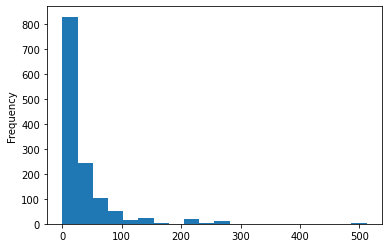

In [7]:
df_all['Fare'].plot.hist(bins=20)

In [8]:
pd.qcut(df_all['Fare'],20) # Como dividir o Fare em bins?

0          (7.225, 7.57]
1        (56.929, 78.02]
2          (7.896, 8.05]
3       (41.579, 56.929]
4          (7.896, 8.05]
              ...       
1304       (7.896, 8.05]
1305     (78.02, 133.65]
1306       (7.225, 7.57]
1307       (7.896, 8.05]
1308      (21.558, 26.0]
Name: Fare, Length: 1309, dtype: category
Categories (20, interval[float64, right]): [(-0.001, 7.225] < (7.225, 7.57] < (7.57, 7.75] <
                                            (7.75, 7.854] ... (41.579, 56.929] <
                                            (56.929, 78.02] < (78.02, 133.65] < (133.65, 512.329]]